<img src="images/Picture0.png" width=200x />

# Notebook 09 - NumPy Basics

## Instructions
Read the material below and complete the exercises.

Material covered in this notebook:

- How to import the numpy module
- How to create arrays and the difference with list
- How to perform basic linear algebra on those arrays
- Matric computations

### Credits
Adapted from work of [J.R. Johansson](https://github.com/jrjohansson/scientific-python-lectures)


## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix, and higher-dimensional data structures for Python. 

To use `numpy` you need to import the module, using for example:

In [1]:
import numpy as np

where we use the custom of shortening the module name for readability. In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*.



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

We will cover the first method here and the latter two in the *Numpy Intermediate* notebook.

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [14]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v # support indexing and slicing, but overrite + *
#no append, or extend
v*10+v

array([11, 22, 33, 44])

In [15]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [16]:
print(type(v))
print(type(M))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [23]:
v.shape


(4,)

In [24]:
M.shape

(2, 2)

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [30]:
M.dtype

v=np.array([1.0])
v.dtype
type(1.0)

float

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [26]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

### Exercise

Create numpy arrays to represent:
$$(2.5,4.1,6,8.2)$$
and 
$$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
Check their shape and dtype.

In [42]:
v = np.array([2.5,4.1,6,8.2])
M = np.array([[1,0,0],[0,1,0],[0,0,1]])
print(M.size ,len(M[0]),M.shape,type(M),M.dtype)

9 3 (3, 3) <class 'numpy.ndarray'> int32


## Manipulating arrays

### Indexing

In [61]:
# v is a vector, and has only one dimension, taking one index
v[0]
a = [1,2,3]

[2, 3]

In [56]:
# M is a matrix, or a 2 dimensional array, taking two indices 
print(M[1][2],M[1,2],M[(1,2)])#,M[*(1,2)])

0 0 0


In [63]:
M[0,0]

1

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [45]:
M

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [46]:
M[1]

array([0, 1, 0])

The same thing can be achieved with using `:` instead of an index: 

In [59]:
M[1,0:5] # row 1

array([0, 1, 0])

In [ ]:
M[:,1] # column 1

We can assign new values to elements in an array using indexing:

In [ ]:
M[0,0] = 0

In [ ]:
M

### Exercise

Create a numpy array to represent 
$$\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$$.
1. Print the entry $5$.
2. Print the row $(7,8,9)$.
3. Print the column $(1,4,7)$.
4. Replace the value $7$ with the value $17$.


In [69]:
M = np.array(list(range(1,10))).reshape(3,3)
M
print(M[1,1],M[2,:],M[:,0])
M[2,0]=17
M

5 [7 8 9] [1 4 7]


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [17,  8,  9]])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [70]:
v1 = np.array([0,1,2,3,4])

In [71]:
v1 + 2

array([2, 3, 4, 5, 6])

In [72]:
v1 * 2

array([0, 2, 4, 6, 8])

Compare with the same operation applied to a list:

In [73]:
[0, 1, 2, 3, 4] * 2

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

We can also do this on higher dimension arrays.

In [74]:
M * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [34, 16, 18]])

In [75]:
M - 2

array([[-1,  0,  1],
       [ 2,  3,  4],
       [15,  6,  7]])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [76]:
M * M # element-wise multiplication

array([[  1,   4,   9],
       [ 16,  25,  36],
       [289,  64,  81]])

In [77]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [81]:
A = np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]])
print(A,v1)

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]] [0 1 2 3 4]


In [79]:
A.shape, v1.shape

((5, 5), (5,))

In [120]:
print(A)
print('v1 = ',v1)
print(A * v1)
print(A * v1.reshape(-1,1))

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
v1 =  [0 1 2 3 4]
[[ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]
 [ 0  5 10 15 20]]
[[ 0  0  0  0  0]
 [ 2  2  2  2  2]
 [ 6  6  6  6  6]
 [12 12 12 12 12]
 [20 20 20 20 20]]


### Exercise
Find the angle between two vectors $(1,2,3)$ and $(4,-5,6)$.

In [105]:

v1 = np.array([1, 2, 3])
v2 = np.array([4, -5, 6])
dot = v1*v2
n1 = sum(v1*v1)
n2 = sum(v2*v2)
co = sum(dot) / np.sqrt(n1*n2)
angle = np.arccos(co)
print(angle)

1.1966404427876283


### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [111]:
np.dot(A,A)
v1 = np.array([0,1,2,3,4])

In [117]:
print(A,v1)
print(np.dot(A, v1),np.dot(v1, A))

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]] [0 1 2 3 4]
[10 20 30 40 50] [40 40 40 40 40]


In [124]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', '

In [132]:
print(type(np.arange(1,10)))
print(type(np.array(list(range(1,10)))))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [161]:
A3 = np.arange(1,25)
A3 = A3.reshape(2,3,4)
A2 = np.arange(1,21).reshape(4,5)
print(A3.shape)
print(A2.shape)
Y = A3@A2
print(Y.shape)

(2, 3, 4)
(4, 5)
(2, 3, 5)


The `@` operator can be used as a shorthand:



In [162]:
A @ A

array([[15, 15, 15, 15, 15],
       [30, 30, 30, 30, 30],
       [45, 45, 45, 45, 45],
       [60, 60, 60, 60, 60],
       [75, 75, 75, 75, 75]])

In [163]:
A @ v1

array([10, 20, 30, 40, 50])

In [197]:
v1 @ v1

30

If we try to add, subtract or multiply objects with incompatible shapes we get 
an error:

In [198]:
v = np.array([1,2,3,4,5])
type(v)
type(A)
print(A)
print(v)

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
[1 2 3 4 5]


In [199]:
print(v*A,v*A == A*v,sep = '\n')
print(A*v.reshape(-1,1))
print(v@A)
print(A@v)

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[ 1  1  1  1  1]
 [ 4  4  4  4  4]
 [ 9  9  9  9  9]
 [16 16 16 16 16]
 [25 25 25 25 25]]
[55 55 55 55 55]
[15 30 45 60 75]


In [206]:
A=np.matrix(A)

numpy.ndarray

In [204]:
np.shape(A), np.shape(v)

((5, 5), (5,))

In [210]:
A * np.matrix(v).T

matrix([[15],
        [30],
        [45],
        [60],
        [75]])

In [218]:
A=np.array(A)
v = np.array(v)
print(A,v,sep='\n')
print(np.inner(v,A),A@v,sep='\n')

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
[1 2 3 4 5]
[15 30 45 60 75]
[15 30 45 60 75]


In [254]:
help(np.tensordot)

Help on function tensordot in module numpy:

tensordot(a, b, axes=2)
    Compute tensor dot product along specified axes.
    
    Given two tensors, `a` and `b`, and an array_like object containing
    two array_like objects, ``(a_axes, b_axes)``, sum the products of
    `a`'s and `b`'s elements (components) over the axes specified by
    ``a_axes`` and ``b_axes``. The third argument can be a single non-negative
    integer_like scalar, ``N``; if it is such, then the last ``N`` dimensions
    of `a` and the first ``N`` dimensions of `b` are summed over.
    
    Parameters
    ----------
    a, b : array_like
        Tensors to "dot".
    
    axes : int or (2,) array_like
        * integer_like
          If an int N, sum over the last N axes of `a` and the first N axes
          of `b` in order. The sizes of the corresponding axes must match.
        * (2,) array_like
          Or, a list of axes to be summed over, first sequence applying to `a`,
          second to `b`. Both element

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

In [238]:
v = np.arange(1,3)
A = np.outer(v,v)
np.kron(A,A)

array([[ 1,  2,  2,  4],
       [ 2,  4,  4,  8],
       [ 2,  4,  4,  8],
       [ 4,  8,  8, 16]])

In [258]:
v = np.arange(1,5)
A = np.outer(v,v)
np.tensordot(A,v,axes = 1).shape

(4,)

In [260]:
A= np.outer([1,2],[1,2,3])
print(A.shape)

(2, 3)


### Exercise
Write a matrix which rotates vectors in $\mathbb{R}^2$ counterclockwise by $60^\circ$. Apply it to the vectors $(1,0)$ and $(0,1)$. Check your results.

In [276]:
from numpy import pi,cos,sin
c=cos(pi/3)
s=sin(pi/3)
A = np.array([[c,-s],[s,c]])
rock = A@[1,0]
roll = A@[0,1]

### Matrix computations

#### Inverse

In [277]:
np.linalg.inv(M) 

array([[ 0.1       , -0.2       ,  0.1       ],
       [-2.2       ,  1.4       , -0.2       ],
       [ 1.76666667, -0.86666667,  0.1       ]])

In [278]:
import numpy.linalg as la
la.inv(M)

array([[ 0.1       , -0.2       ,  0.1       ],
       [-2.2       ,  1.4       , -0.2       ],
       [ 1.76666667, -0.86666667,  0.1       ]])

### Exercise
Verify that this is the inverse of $M$.

In [281]:
M@la.inv(M)

array([[1.00000000e+00, 3.33066907e-16, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.11022302e-16, 1.00000000e+00]])

In [286]:
la.det(M)* la.det(la.inv(M)) -1

4.440892098500626e-16

#### Determinant

In [ ]:
np.linalg.det(M)

In [ ]:
np.linalg.det(np.linalg.inv(M))

<hr>
<font face="verdana" style="font-size:30px" color="blue">---------- Optional Advanced Material ----------</font>


## Mini-project 1: Linear Regression

In this section you will perform linear regression using matrix algebra. Let us first generate the data for the regression

In [ ]:
# 1. Generate x and y values for linear regression.
np.random.seed(0)  # Seed for reproducibility
x = 2 * np.random.rand(100, 1)
y = 3 * x + np.random.randn(100, 1)  # y = 3x + gaussian noise

In [287]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

Write a function to perform linear regression for y ~ x. [This](https://www.sydney.edu.au/content/dam/students/documents/mathematics-learning-centre/using-matrix-algebra-in-linear-regression.pdf) link might be helpful if you've forgoten how to do this using matrix algebra.

In [ ]:
# 2. Compute the linear regression.
beta = ...

Run the following code to plot the resulting regression line

In [ ]:
# 3. Plot the data points and the regression line.
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', s=30, label='Data points')
plt.plot(x, beta * x, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.grid(True)
plt.show()

## Mini-project 2: Adjacency Matrix

The adjacency matrix $A$ of a graph with $n$ nodes is an $n\times n$ matrix where the entry $a_{i,j}=1$ if there is an edge between vertices $i$ and $j$ and $a_{i,j}=0$ otherwise. 
1. Write the adjacency matrix for the graph pictured below. You'll need to choose an ordering on the vertices.
2. What does $A^2$ represent?
3. Use the adjacency matrix to calculate the diameter of the graph. (Hint: use #2.)

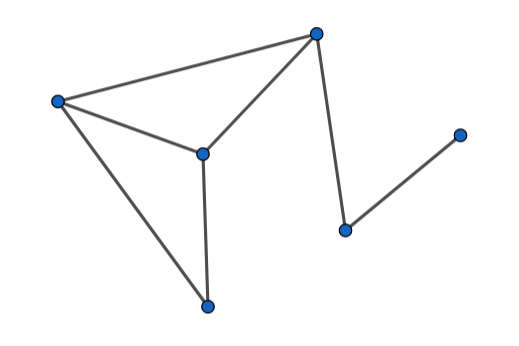